The code below generates a GIF that displays the TCAE model's predictions for a single training and validation example. The TCAE model receives only the first frame as input and uses changes in its delta t input to evolve the dynamics of the Microtubule network.

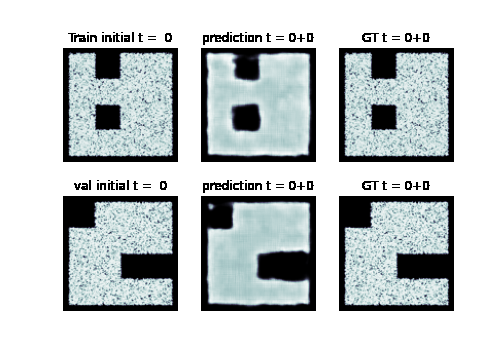

In [1]:
import os
import glob
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
from TCAE import TConvAutoEncoder
from skimage.io import ImageCollection, imread
import matplotlib.pyplot as plt
from helper_functions import pattern_number2dir, embed_images, matplotlib_fig_to_np_array
from image_processing_functions import imread_convert

experiment_name = "prediction_am_sim_002"
base_dir = os.path.join(os.getcwd(), experiment_name)
weights_dir = os.path.join(base_dir,'weights')
data_dir = os.path.join(os.getcwd(), 'sim_data_112x112/') 

training_set  = np.load('training_set.npy')
validation_set  = np.load('validation_set.npy')
training_set = [data_dir + 'pattern_' + str(pattern).zfill(5) + '/*' for pattern in training_set]
validation_set = [data_dir + 'pattern_' + str(pattern).zfill(5) + '/*' for pattern in validation_set]

tcae = TConvAutoEncoder(64)
tcae((np.zeros((1,112,112,1)),np.zeros((1,1))))
tcae.load_weights(weights_dir + f'/TCAE_epoch_{29}.h5')

train_example = ImageCollection(sorted(glob.glob(training_set[4])), load_func =imread_convert)
val_example = ImageCollection(sorted(glob.glob(validation_set[518])), load_func = imread_convert)


figures = []
initial_frame = 0
n_frames = 170
cmap = 'bone'

for dt in range(0, n_frames, 2):
    dt_vector = np.array([[dt]], dtype = 'float32')
    pred_val = tcae.predict((np.expand_dims(val_example[initial_frame], 0), dt_vector),  verbose=0)
    pred_train = tcae.predict((np.expand_dims(train_example[initial_frame], 0), dt_vector), verbose=0)

    f = plt.figure(figsize=(7,5))

    ax1 = plt.subplot(2,3,1)
    plt.imshow(train_example[initial_frame], cmap = cmap)
    ax1.set_title(f"Train initial t =  {initial_frame}")
    plt.axis('off')

    ax2 = plt.subplot(2,3,2)
    plt.imshow(pred_train[0], cmap = cmap)
    ax2.set_title(f"prediction t = {initial_frame}+{dt}")
    plt.axis('off')

    ax3 = plt.subplot(2,3,3)
    plt.imshow(train_example[initial_frame + dt], cmap = cmap)
    ax3.set_title(f"GT t = {initial_frame}+{dt}")
    plt.axis('off')


    ax4 = plt.subplot(2,3,4)
    plt.imshow(val_example[initial_frame], cmap = cmap)
    ax4.set_title(f"val initial t =  {initial_frame}")
    plt.axis('off')

    ax5 = plt.subplot(2,3,5)
    plt.imshow(pred_val[0], cmap = cmap)
    ax5.set_title(f"prediction t = {initial_frame}+{dt}")
    plt.axis('off')

    ax6 = plt.subplot(2,3,6)
    plt.imshow(val_example[initial_frame + dt], cmap = cmap)
    ax6.set_title(f"GT t = {initial_frame}+{dt}")
    plt.axis('off')
    
    figures.append(matplotlib_fig_to_np_array(f))
    
    plt.close()

embed_images(figures, duration=.01)